# Project: Heart Faliure Classifiction

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score as mi
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
df=pd.read_csv("D:\Applied Data Science & AI\Project\Heart Faliure Prediction\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [17]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [18]:
df.columns= df.columns.str.lower().str.replace(' ','_')

In [19]:
categorical_column=list(df.dtypes[df.dtypes=='object'].index)
for c in categorical_column:
    df[c]=df[c].str.lower().str.replace(' ','_')

In [21]:
df.dtypes

age                 int64
sex                object
chestpaintype      object
restingbp           int64
cholesterol         int64
fastingbs           int64
restingecg         object
maxhr               int64
exerciseangina     object
oldpeak           float64
st_slope           object
heartdisease        int64
dtype: object

In [22]:
df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

## Splitting Data into Train and Test set with 60-20-20 ratio

In [23]:
df_full_train,df_test= train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val= train_test_split(df_full_train,test_size=0.25,random_state=1)

In [24]:
len(df_train),len(df_val),len(df_test)

(550, 184, 184)

In [25]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_full_train=df_full_train.reset_index(drop=True)

In [26]:
y_train=df_train.heartdisease.values
y_val=df_val.heartdisease.values
y_test=df_test.heartdisease.values
y_full_train=df_full_train.heartdisease.values

In [27]:
del df_train['heartdisease']
del df_val['heartdisease']
del df_test['heartdisease']

## EDA

In [28]:
df_full_train.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [29]:
df_full_train.heartdisease.value_counts(normalize=True)

1    0.542234
0    0.457766
Name: heartdisease, dtype: float64

In [30]:
global_heartD_rate=df.heartdisease.mean()
round(global_heartD_rate,2)

0.55

In [31]:
df.dtypes

age                 int64
sex                object
chestpaintype      object
restingbp           int64
cholesterol         int64
fastingbs           int64
restingecg         object
maxhr               int64
exerciseangina     object
oldpeak           float64
st_slope           object
heartdisease        int64
dtype: object

In [32]:
numeric=['age','restingbp','cholesterol','fastingbs','maxhr','oldpeak']

In [33]:
categorical=[
     'sex', 'chestpaintype', 'restingecg', 'exerciseangina',  'st_slope'
]

In [34]:
df_full_train[categorical].nunique()

sex               2
chestpaintype     4
restingecg        3
exerciseangina    2
st_slope          3
dtype: int64

In [35]:
def Mutual_information(series):
    return mi(series,df_full_train.heartdisease)

In [36]:
m= df_full_train[categorical].apply(Mutual_information)
m.sort_values(ascending=False)

st_slope          0.184472
chestpaintype     0.151883
exerciseangina    0.123210
sex               0.046335
restingecg        0.006789
dtype: float64

## One Hot Encodding

In [37]:
train_dict= df_train[categorical+numeric].to_dict(orient='records')

In [38]:
dv=DictVectorizer(sparse=False)

In [39]:
X_train=dv.fit_transform(train_dict)

In [40]:
features_name=list(dv.get_feature_names_out())
features_name

['age',
 'chestpaintype=asy',
 'chestpaintype=ata',
 'chestpaintype=nap',
 'chestpaintype=ta',
 'cholesterol',
 'exerciseangina=n',
 'exerciseangina=y',
 'fastingbs',
 'maxhr',
 'oldpeak',
 'restingbp',
 'restingecg=lvh',
 'restingecg=normal',
 'restingecg=st',
 'sex=f',
 'sex=m',
 'st_slope=down',
 'st_slope=flat',
 'st_slope=up']

In [41]:
val_dict=df_val[categorical+numeric].to_dict(orient='records')

In [42]:
X_val=dv.transform(val_dict)

In [43]:
del df_full_train['heartdisease']

In [44]:
full_train_dict= df_full_train[categorical+numeric].to_dict(orient='records')
X_full_train=dv.transform(full_train_dict)

In [45]:
dict_full_test=df_test[categorical+numeric].to_dict(orient='records')
X_test=dv.transform(dict_full_test)

## Logistic Regression

In [46]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict_proba(X_val)[:,1]

C:\Users\SCS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
score=roc_auc_score(y_val,y_pred)
score

0.9091124822021832

In [48]:
model.fit(X_full_train,y_full_train)
y_final=model.predict_proba(X_test)[:,1]

C:\Users\SCS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
score_final=roc_auc_score(y_test,y_final)
score_final

0.954791154791155

## Random Forest and Tuning the algorithm

In [56]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [57]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

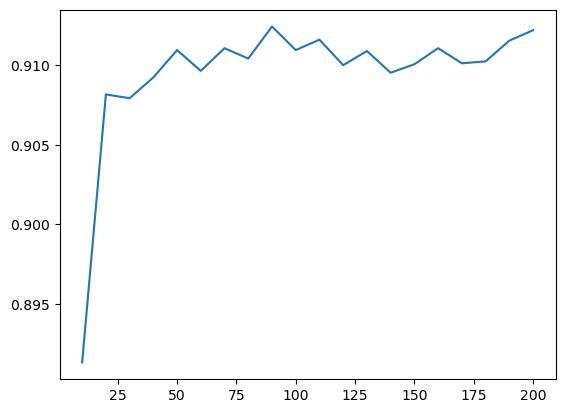

In [58]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [59]:
scores = []

for d in [5, 10, 15,20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [60]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

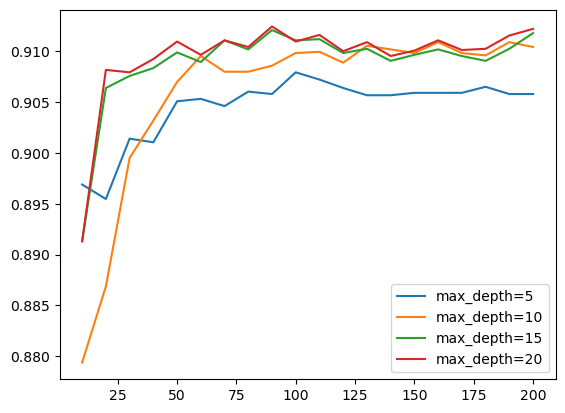

In [61]:
for d in [5, 10, 15,20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [62]:
scores = []
max_depth = 10
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [63]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

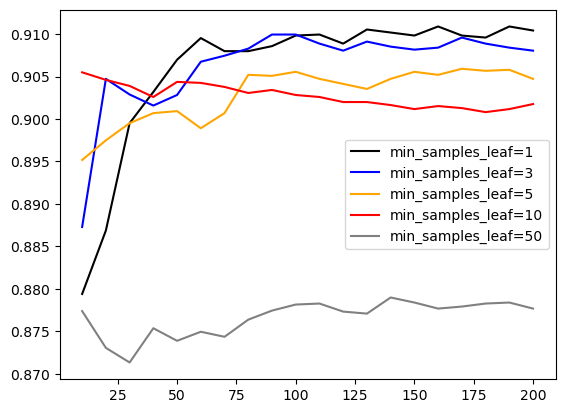

In [64]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [60]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=20,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.9109515899383008

In [61]:
rf.fit(X_full_train,y_full_train)
y_final_pred=model.predict_proba(X_test)[:,1]

In [62]:
auc1 = roc_auc_score(y_test, y_final_pred)
auc1

0.954791154791155

# Creating Script File of Our Model

In [70]:
import pickle

In [71]:
#output_file='model_C=%s.bin' % C
#output_file=f'model_C={C}.bin' 
outfile='model1.bin'

In [52]:
f_out=open(outfile,'wb')
pickle.dump((dv,model),f_out)
f_out.close()

In [ ]:
outfile='model1.bin'

In [54]:
with open(outfile, 'rb') as f_in: 
    dv1,model1=pickle.load(f_in)

In [55]:
dv1,model1

(DictVectorizer(sparse=False), LogisticRegression())

In [76]:
customer={
    'age': 37,
    'sex': 'M',
    'chestpain': 'ASY',
    'restingbp' :140,
    'Cholesterol': 207,
    'FastingBS': 0 ,
    'RestingECG': 'Normal', 
    'MaxHR':  130,
    'ExerciseAngina': 'Y',
    'Oldpeak': 1.5,
    'ST_Slope': 'Flat'
    

}
answer=1

In [77]:
X = dv.transform([customer])

In [58]:
y_pred = model.predict_proba(X)[0, 1]

In [59]:
print('input:', customer)
print('output:', y_pred)

input: {'age': 37, 'sex': 'M', 'chestpain': 'ASY', 'restingbp': 140, 'Cholesterol': 207, 'FastingBS': 0, 'RestingECG': 'Normal', 'MaxHR': 130, 'ExerciseAngina': 'Y', 'Oldpeak': 1.5, 'ST_Slope': 'Flat'}
output: 0.7357396010503067
